UM MSBA - BGEN

# Week 10 Independent Lab: Decision Trees
---
    Author: Ellery Bresler
    Course: BGEN632 Grad. Intro. to Python
    Term: Spring 2025
    Date: May 7th, 2025


## 	&#x1f4bb; New System & Employee Usage &#x1f4bb;

Recall that I belong to a team assigned to assess the condition of the healthcare system in California. You currently work in the Information Systems department for a consulting firm working with the state government agency that oversees the healthcare system in California. 

#### Import Modules 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

#### Set Working Directory & Accessing Data 

In [2]:
os.chdir("/Users/ElleryBresler/Documents/GitHub/week10labs/data")  # change this to your filepath

ca_hospital_data = pd.read_csv('calihospital.txt', delimiter='\t')
ca_hospital_data.to_csv('CaliforniaHospitalData_Personnel.csv', index=False)

num_cols = ca_hospital_data[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']]


## Classification Trees and Regression Trees

In the previous weeks, your supervisor tasked you with subsetting and describing hospital data. Now, they would like you assess the data and build initial models. Specifically, they would like you to build decision trees. 

This assignment requires you to build *classification* trees and *regression* trees.

Decide on the predictor variables you use for these analyses. Have at least one categorical predictor and one numerical predictor. In total, have at least three predictors per model. Keep in mind that some of the variables are highly correlated (e.g., Operating Revenue and Net Patient Revenue) and should not be modeled together.

* Using `operating income` as a target variable, create a tree
* Using `operating revenue` as a target variable, create a tree 
* Using `TypeControl` as a target variable, create a tree
* Using `DonorType` as a target variable, create a tree

Now that you have built several different trees, you need to assess each one.

* Interpret your findings for these trees. Explain why you think the splits you received make sense.
* Which of these trees would you choose as your best model? Justify your position.
  * Note that you do not have to use an objective assessment, such as scoring predicted values, due to the small sample size.

#### Operating Income

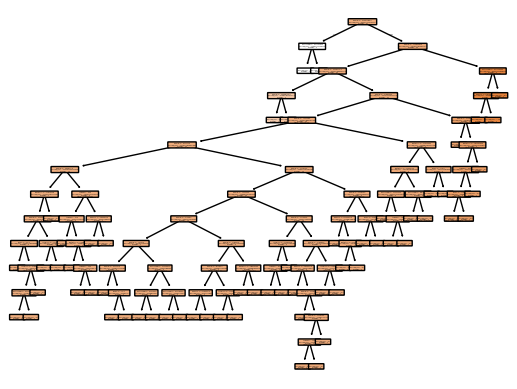

In [4]:
tree_model_1 = tree.DecisionTreeRegressor().fit(num_cols, ca_hospital_data.OperInc)

col_names = list(num_cols.columns.values)

tree.plot_tree(tree_model_1, feature_names=col_names, filled=True, rounded=True)

plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(num_cols, ca_hospital_data.OperInc)
path = tree_model_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1])
    )


Number of nodes in the last tree is: 1 with ccp_alpha: 2415486222480605.5


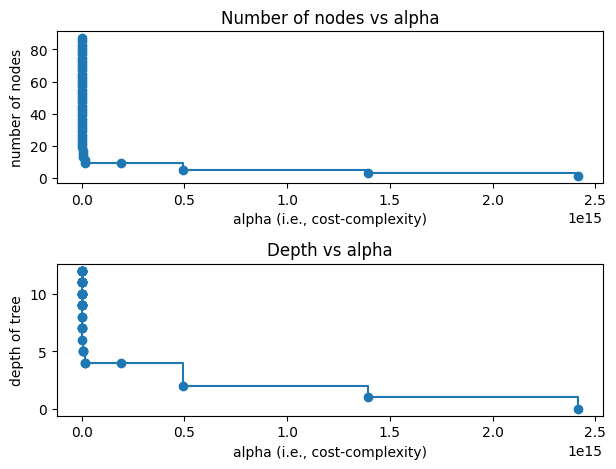

In [16]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha (i.e., cost-complexity)")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha (i.e., cost-complexity)")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

#### Operating Revenue

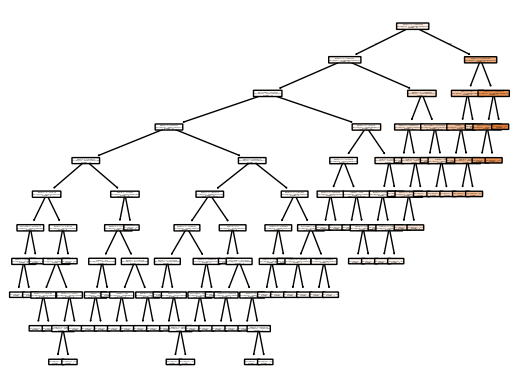

In [8]:
tree_model_2 = tree.DecisionTreeRegressor().fit(num_cols, ca_hospital_data.OperRev)

col_names = list(num_cols.columns.values)

tree.plot_tree(tree_model_2, feature_names=col_names, filled=True, rounded=True)

plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(num_cols, ca_hospital_data.OperRev)
path = tree_model_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1])
    )

Number of nodes in the last tree is: 1 with ccp_alpha: 1.774214238496606e+17


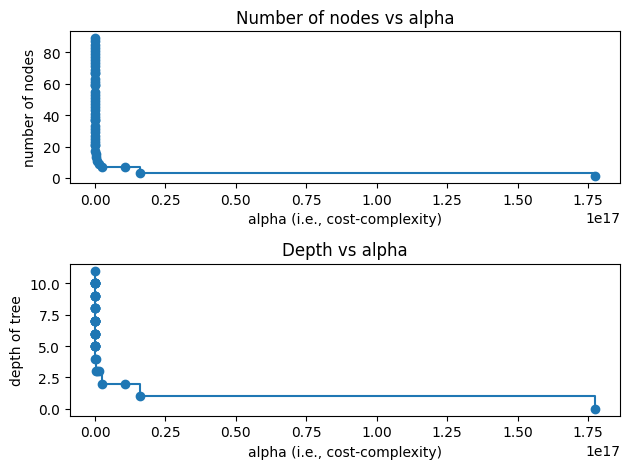

In [19]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha (i.e., cost-complexity)")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha (i.e., cost-complexity)")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

#### Type Control

In [22]:
ca_hospital_data['TypeControl'].unique()

array(['District', 'Non Profit', 'Investor', 'City/County'], dtype=object)

In [26]:
print(ca_hospital_data.columns)


Index(['HospitalID', 'Name', 'Zip', 'Website', 'TypeControl', 'Teaching',
       'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev',
       'OperInc', 'AvlBeds', 'Work_ID', 'LastName', 'FirstName', 'Gender',
       'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate'],
      dtype='object')


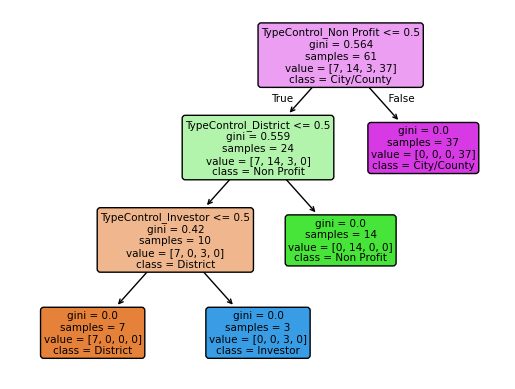

In [27]:
# Get the class names from 'TypeControl'
cls_names = list(ca_hospital_data['TypeControl'].unique())

# One-hot encode categorical variables
onehot_data = pd.get_dummies(ca_hospital_data[['HospitalID', 'Name', 'Zip', 'Website', 'TypeControl', 'Teaching',
       'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev',
       'OperInc', 'AvlBeds', 'Work_ID', 'LastName', 'FirstName', 'Gender',
       'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate']], drop_first=True)

# Fit decision tree model
tree_model_3 = tree.DecisionTreeClassifier().fit(onehot_data, ca_hospital_data['TypeControl'])

# Visualize tree
tree.plot_tree(tree_model_3, feature_names=onehot_data.columns, class_names=cls_names, filled=True, rounded=True)
plt.show()

In [29]:
# get predicted values
predicted = tree_model_3.predict(onehot_data)

# get model performance evaluation metrics
print(metcs.classification_report(ca_hospital_data.TypeControl, predicted))

# get confusion matrix
cm = metcs.confusion_matrix(ca_hospital_data.TypeControl, predicted)
print(cm)

              precision    recall  f1-score   support

 City/County       1.00      1.00      1.00         7
    District       1.00      1.00      1.00        14
    Investor       1.00      1.00      1.00         3
  Non Profit       1.00      1.00      1.00        37

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

[[ 7  0  0  0]
 [ 0 14  0  0]
 [ 0  0  3  0]
 [ 0  0  0 37]]


([<matplotlib.axis.XTick at 0x12184ca50>,
 [Text(0, 1, 'I'), Text(1, 1, 'II'), Text(2, 1, 'III'), Text(3, 1, 'IV')])

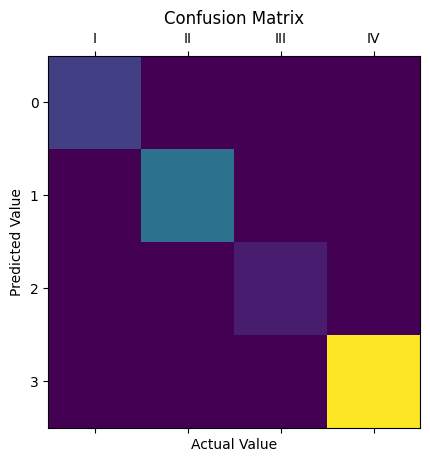

In [30]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2,3], ['I','II','III','IV'])

#### DonorType

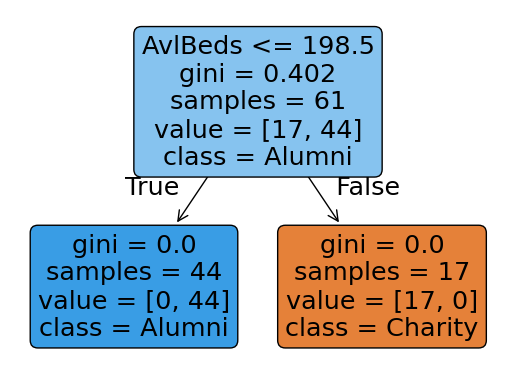

In [31]:
# Get the class names from 'TypeControl'
cls_names = list(ca_hospital_data['DonorType'].unique())

# One-hot encode categorical variables
onehot_data = pd.get_dummies(ca_hospital_data[['HospitalID', 'Name', 'Zip', 'Website', 'TypeControl', 'Teaching',
       'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev',
       'OperInc', 'AvlBeds', 'Work_ID', 'LastName', 'FirstName', 'Gender',
       'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate']], drop_first=True)

# Fit decision tree model
tree_model_3 = tree.DecisionTreeClassifier().fit(onehot_data, ca_hospital_data['DonorType'])

# Visualize tree
tree.plot_tree(tree_model_3, feature_names=onehot_data.columns, class_names=cls_names, filled=True, rounded=True)
plt.show()

In [32]:
# get predicted values
predicted = tree_model_3.predict(onehot_data)

# get model performance evaluation metrics
print(metcs.classification_report(ca_hospital_data.DonorType, predicted))

# get confusion matrix
cm = metcs.confusion_matrix(ca_hospital_data.DonorType, predicted)
print(cm)

              precision    recall  f1-score   support

      Alumni       1.00      1.00      1.00        17
     Charity       1.00      1.00      1.00        44

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

[[17  0]
 [ 0 44]]


([<matplotlib.axis.XTick at 0x121750050>,
 [Text(0, 1, 'I'), Text(1, 1, 'II'), Text(2, 1, 'III'), Text(3, 1, 'IV')])

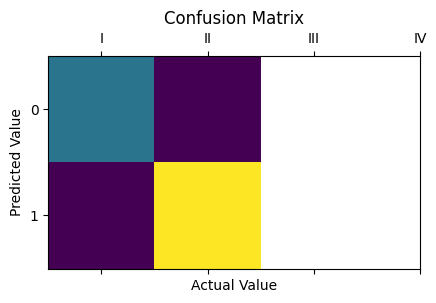

In [33]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2,3], ['I','II','III','IV'])

## Dataset Contents

This table provides the variables in the hospital data.

| Item | Definition |
|:---|:---|
| HospitalID | The primary key of each hospital |
| Name | The legal name of the hospital |
| Zip |	Zip code where the hospital is located |
| Website |	The url for the hospital’s website |
| TypeControl |	Indicates the primary managing entity of the hospital |
| Teaching |	Indicates teaching status |
| DonorType |	This field indicates the most prominent group of donors |
| NoFTE |	Number of full-time employees registered at the hospital |
| NetPatRev |	Net patient revenue |
| InOperExp |	Estimate of the inpatient operating costs |
| OutOperExp |	Estimate of the outpatient operating costs |
| OperRev |	Operating revenue of the hospital |
| OperInc |	Operating Income is the operating revenue less the operating expenses |
| AvlBeds |	The number of available beds in the hospital |
| Work_ID |	Primary key of the personnel |
| LastName |	The last name of the personnel |
| FirstName |	First name of the personnel |
| Gender |	Gender of the individual |
| PositionID |	The foreign key for the position held |
| PositionTitle |	The title of this position |
| Compensation |	The annual amount the position is compensated for service |
| MaxTerm |	The maximum number of years an individual can serve in this position |
| StartDate |	The beginning of service for this position |